In [1]:
from main import main

main()

TP 3: PERCEPTRON SIMPLE
EJERCIO 1
Función lógica AND
Entrenando con Perceptron Simple Escalon
Pesos finales: [-0.022652    0.6250294   0.62630198]
Generalizando con Perceptron Simple Escalon
Entrada: 
[[-1  1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]]
Resultado: [-1 -1 -1  1]

Función lógica XOR
Entrenando con Perceptron Simple Escalon
Pesos finales: [0.35651859 0.35130536 0.03829507]
Generalizando con Perceptron Simple Escalon
Entrada: 
[[-1  1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]]
Resultado: [ 1  1 -1  1]

EJERCIO 2
Entrenando con Perceptron Simple Lineal
Pesos finales: [ 8.31227167  8.80035624  0.44345419 14.03075449]


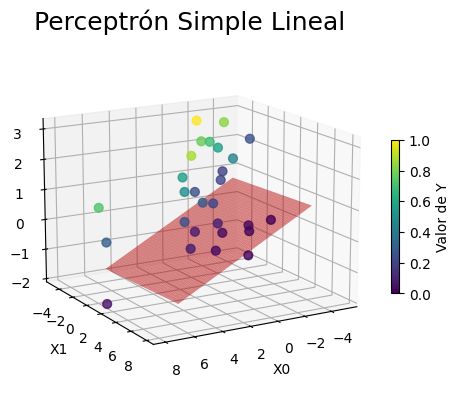

In [2]:
import numpy as np
import pandas as pd
from src.perceptron_simple_lineal import perceptron_simple_lineal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ruta del archivo CSV
archivo_csv = "TP3-ej2-conjunto.csv"
# Leer datos CSV en un DataFrame de pandas
datos_df = pd.read_csv(archivo_csv)
# Convertir DataFrame a un array de NumPy
datos_array = datos_df.to_numpy()
# Extract feature columns (x1, x2, x3) into 'x' array
x = datos_array[:, :-1]  # Assuming 'y' is the last column

# Extract target column (y) into 'y' array
y = datos_array[:, -1]

eta = 0.01
epoch = 100
epsilon = 0.01 
w = perceptron_simple_lineal(x.copy(), y, eta, epsilon, epoch)

# Normalizar valores de 'y' para el colormap
y_norm = (y - y.min()) / (y.max() - y.min())

# Definir colormap y escalar
cmap = plt.cm.viridis
norm = plt.Normalize(0, 1)

# Graficar plano y puntos
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar plano
X, Y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
Z = -(w[0] + w[1] * X + w[2] * Y) / w[3] 
ax.plot_surface(X, Y, Z, color='red', alpha=0.5)

# Graficar puntos
points = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=cmap(y_norm), s=40, alpha=0.8)

# Ajustar etiquetas y título
ax.set_xlabel('X0', fontsize=10)  # Set font size for x-axis label
ax.set_ylabel('X1', fontsize=10)  # Set font size for y-axis label
ax.set_zlabel('X2', fontsize=10)  # Set font size for z-axis label
ax.set_title('Perceptrón Simple Lineal ', fontsize=18)  # Set font size for title

# Ajustar vista
ax.view_init(elev=15, azim=60)
ax.set_zlim(x[:, 2].min(), x[:, 2].max())  # Set z-axis limits based on data range

# Añadir 'points' al eje y crear la barra de color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(y)
cbar = fig.colorbar(sm, label='Valor de Y', ax=ax, fraction=0.02)  

# Mostrar gráfico
plt.tight_layout()
plt.subplots_adjust(left=0.5)
plt.show()



In [ ]:
import numpy as np
import pandas as pd
from src.perceptron_simple_lineal import perceptron_simple_lineal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ruta del archivo CSV
archivo_csv = "TP3-ej2-conjunto.csv"
# Leer datos CSV en un DataFrame de pandas
datos_df = pd.read_csv(archivo_csv)
# Convertir DataFrame a un array de NumPy
datos_array = datos_df.to_numpy()
# Extract feature columns (x1, x2, x3) into 'x' array
x = datos_array[:, :-1]  # Assuming 'y' is the last column

# Extract target column (y) into 'y' array
y = datos_array[:, -1]

eta = 0.01
epoch = 100
epsilon = 0.01

# Normalizar valores de 'y' para el colormap
y_norm = (y - y.min()) / (y.max() - y.min())

# Definir colormap y escalar
cmap = plt.cm.viridis
norm = plt.Normalize(0, 1)

for _ in range(10):
    w = perceptron_simple_lineal(x.copy(), y, eta, epsilon, epoch)

    # Graficar plano y puntos
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar plano
    X, Y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    Z = -(w[0] + w[1] * X + w[2] * Y) / w[3] 
    ax.plot_surface(X, Y, Z, color='red', alpha=0.5)

    # Graficar puntos
    points = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=cmap(y_norm), s=40, alpha=0.8)

    # Ajustar etiquetas y título
    ax.set_xlabel('X0', fontsize=10)  # Set font size for x-axis label
    ax.set_ylabel('X1', fontsize=10)  # Set font size for y-axis label
    ax.set_zlabel('X2', fontsize=10)  # Set font size for z-axis label
    ax.set_title('Perceptrón Simple Lineal ', fontsize=18)  # Set font size for title

    # Ajustar vista
    ax.view_init(elev=15, azim=60)
    ax.set_zlim(x[:, 2].min(), x[:, 2].max())  # Set z-axis limits based on data range

    # Añadir 'points' al eje y crear la barra de color
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(y)
    cbar = fig.colorbar(sm, label='Valor de Y', ax=ax, fraction=0.02)  

    # Mostrar gráfico
    plt.tight_layout()
    plt.subplots_adjust(left=0.5)
plt.show()
